In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
from matplotlib.dates import MonthLocator, DateFormatter
from utilities import filterout, normalize,get_common_dates
import seaborn as sns
import scipy.stats as stats
sns.set_style("darkgrid")
sns.mpl.rc("figure", figsize=(8, 8))
#import QuantLib as ql

In [2]:
filenames = [ "IG","HY","SPX"]

# Store each series in a mapping from filename to dataframe
dfs = {
    fn: pd.read_csv(f"{fn}.csv", parse_dates=["Date"]) for fn in filenames
}
# Get the intersection of the time series data relative to common dates
date_index = get_common_dates(dfs,filenames)
common_date_dfs = {
    fn: dfs[fn][date_index[fn]] for fn in filenames
}
# Set the index of the dataframes to be the dates
for key in common_date_dfs.keys():
    common_date_dfs[key] = common_date_dfs[key].set_index("Date")
    
# Normalized time series
normalized_series = {
    fn: normalize(common_date_dfs[fn][fn]) for fn in filenames
}

#convert date into stationary series
stationary_series = {
    fn:np.diff(np.log(common_date_dfs[fn][fn])) for fn in filenames
}


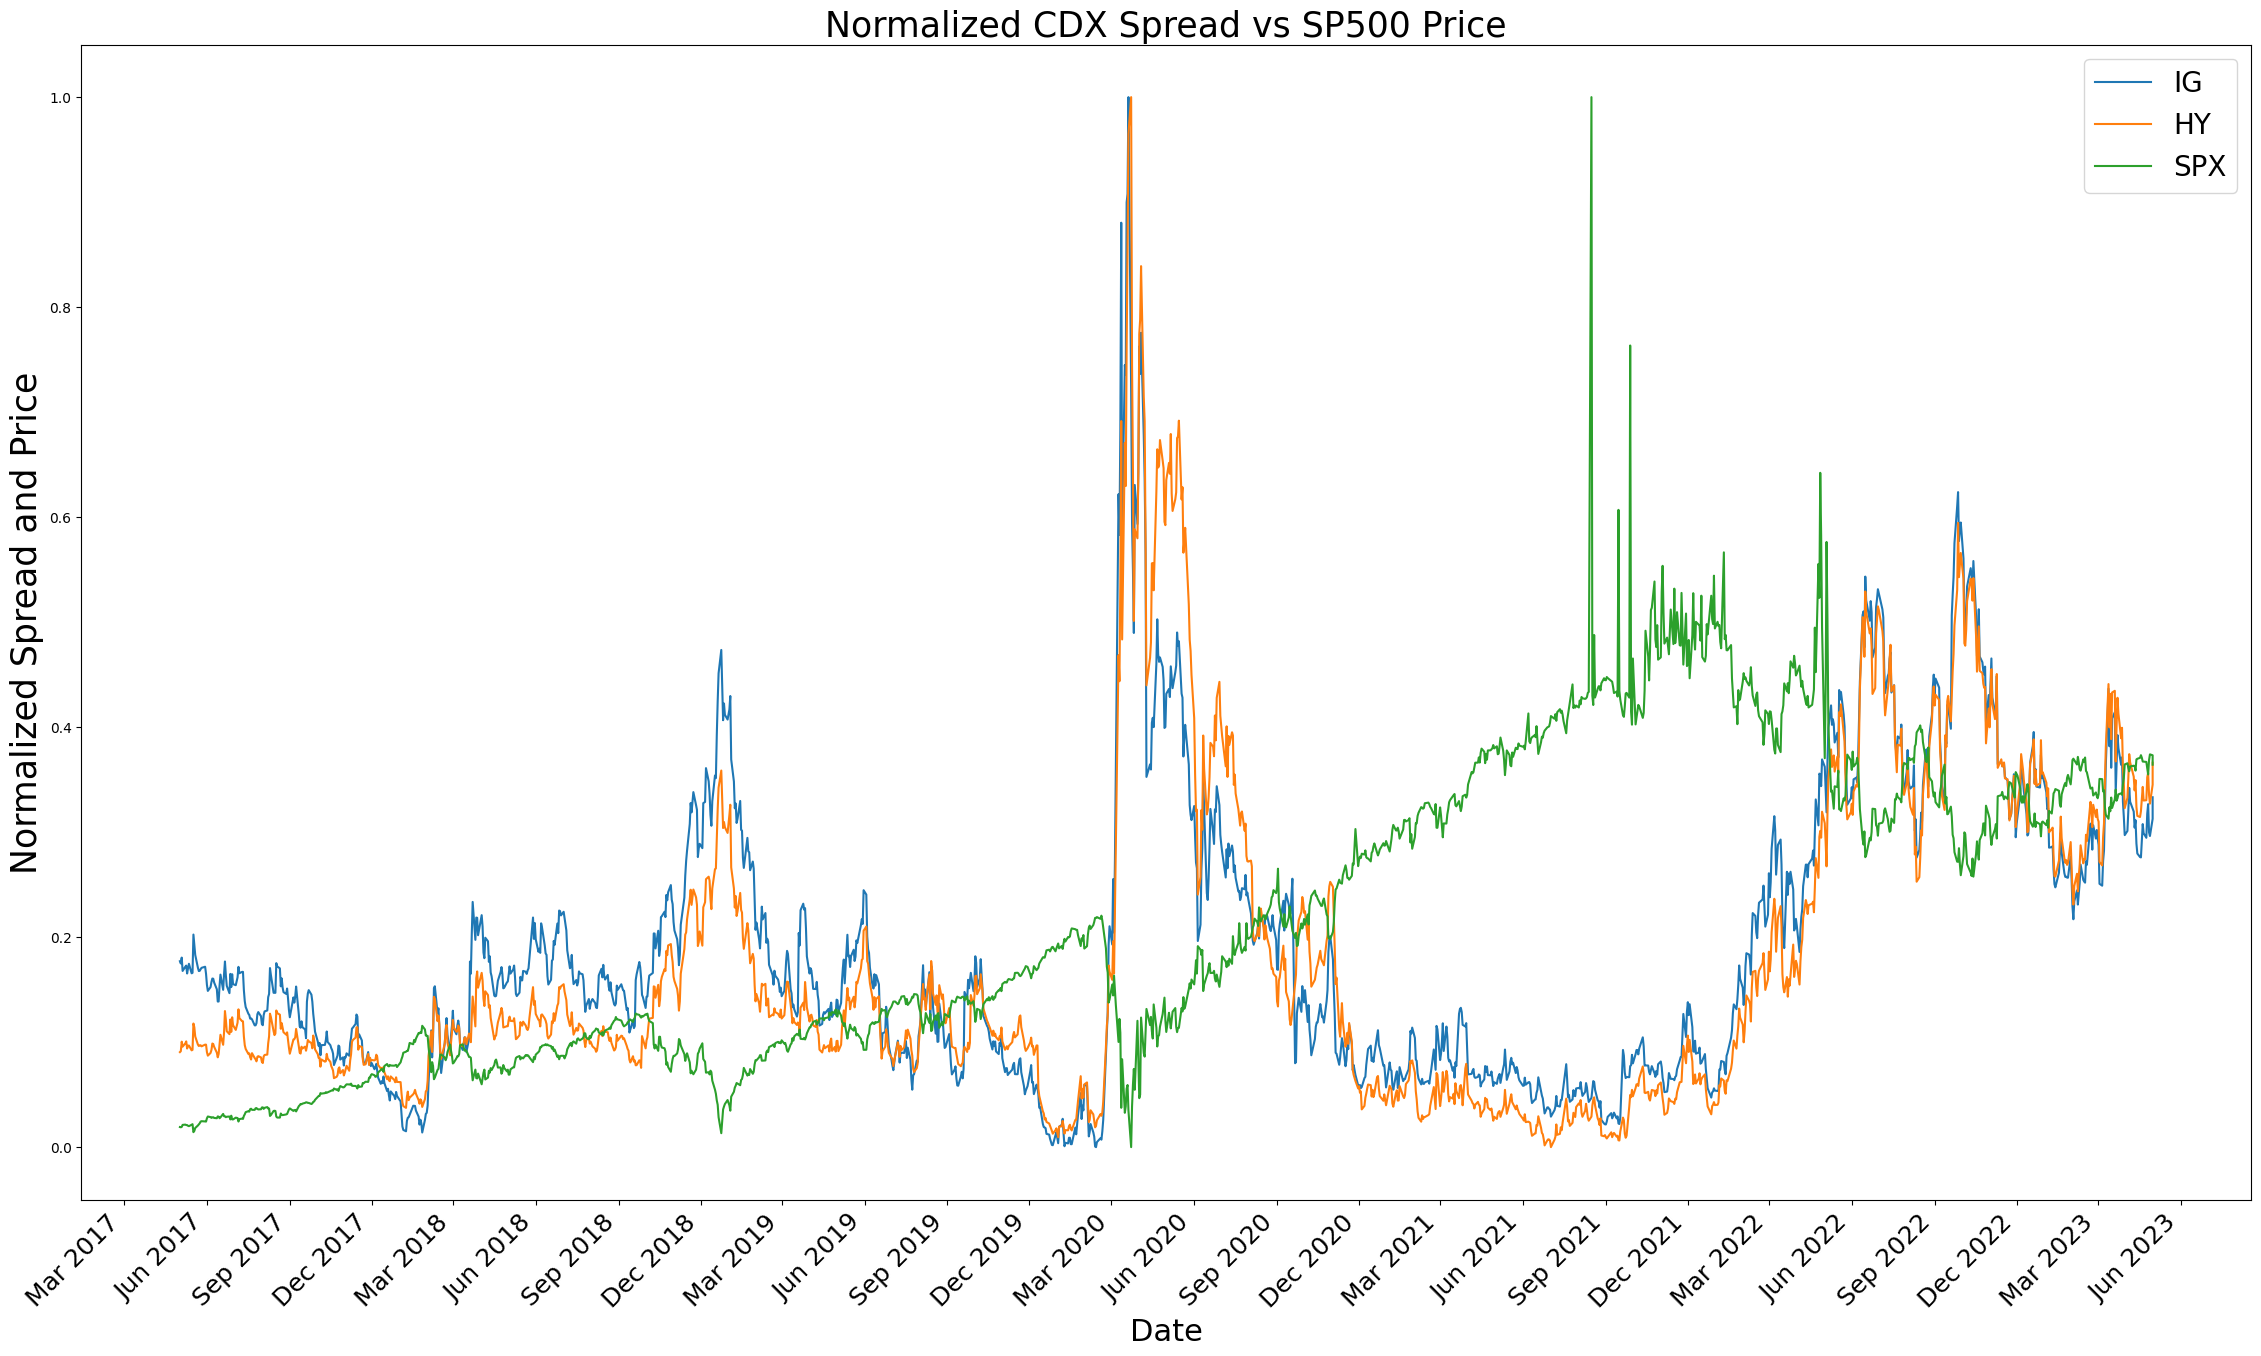

In [4]:
data = ['IG','HY','SPX']
fig, ax = plt.subplots(figsize=(28, 15))
[ax.plot(common_date_dfs[label].index, normalized_series[label], label=label) for label in data]
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right',fontsize=18)
plt.xlabel('Date',fontsize = 22)
plt.ylabel('Normalized Spread and Price',fontsize = 25)
plt.title('Normalized CDX Spread vs SP500 Price',fontsize = 25)
plt.legend(fontsize=20)
plt.savefig('normalized_combined')
plt.show()

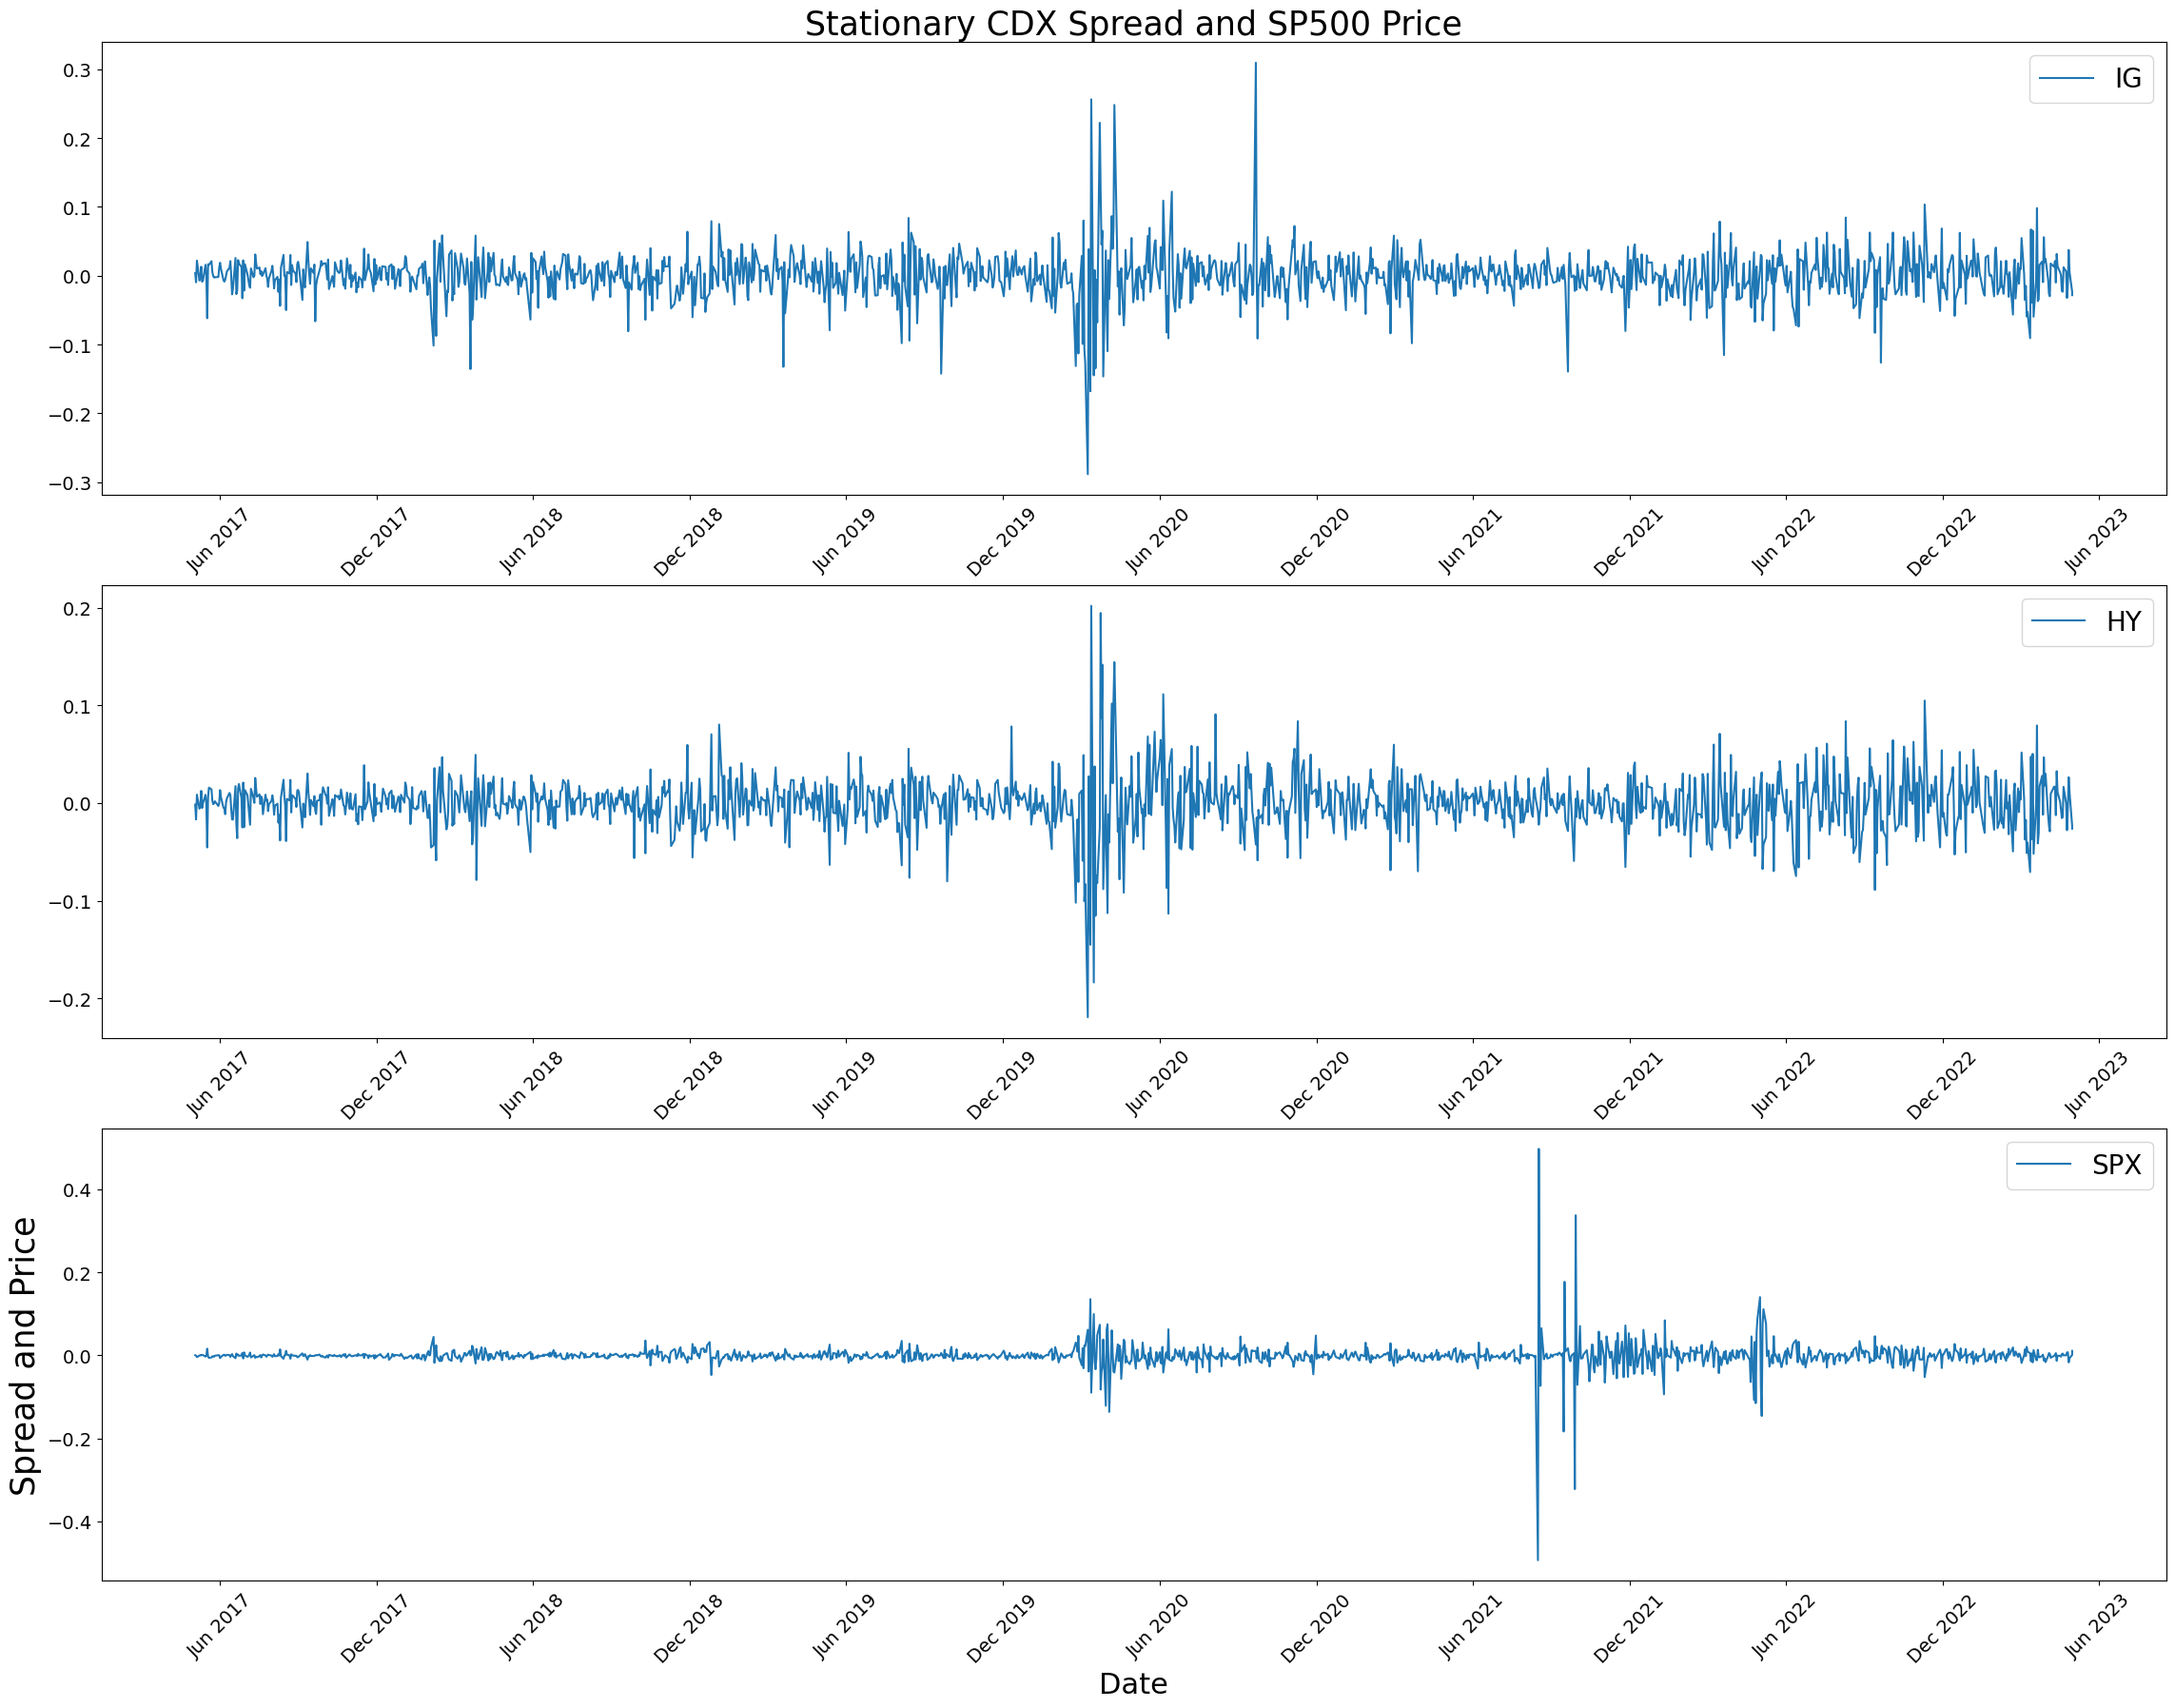

In [24]:
data = ['IG','HY','SPX']
fig, ax = plt.subplots(3,figsize=(28, 21))
for i in range(len(data)):
    ax[i].plot(common_date_dfs[data[i]].index[:-1], stationary_series[data[i]], label=data[i])
    ax[i].xaxis.set_major_locator(MonthLocator(interval=6))
    ax[i].xaxis.set_major_formatter(DateFormatter('%b %Y'))
    ax[i].tick_params(axis = 'x',rotation=45,labelsize=14)
    ax[i].tick_params(axis='y',labelsize = 14)
    ax[i].legend(fontsize=20)
plt.xlabel('Date',fontsize = 22)
plt.ylabel('Spread and Price',fontsize = 25)
ax[0].set_title('Stationary CDX Spread and SP500 Price',fontsize = 25)
plt.savefig("stationary_combined")
plt.show()

In [43]:
#copula
from statsmodels.distributions.copula.api import (CopulaDistribution, GumbelCopula, IndependenceCopula)
copula = GumbelCopula()
IG_SPX = np.stack((stationary_series['IG'],stationary_series['SPX']),axis=1)
theta = copula.fit_corr_param(IG_SPX)
print(theta)

0.6459615858163014


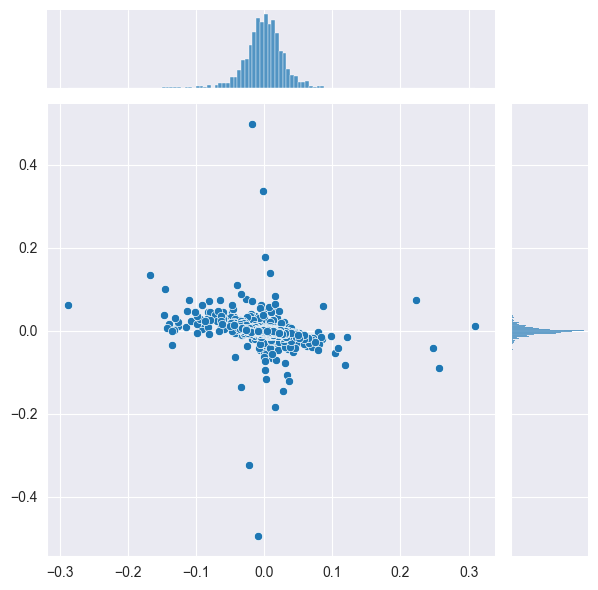

In [49]:
sns.jointplot(x=IG_SPX[:, 0], y=IG_SPX[:, 1], kind="scatter");


In [34]:
stationary_series['SPX']

array([ 0.01085817,  0.001076  , -0.00664499, ..., -0.00412596,
       -0.00063402,  0.00044511])

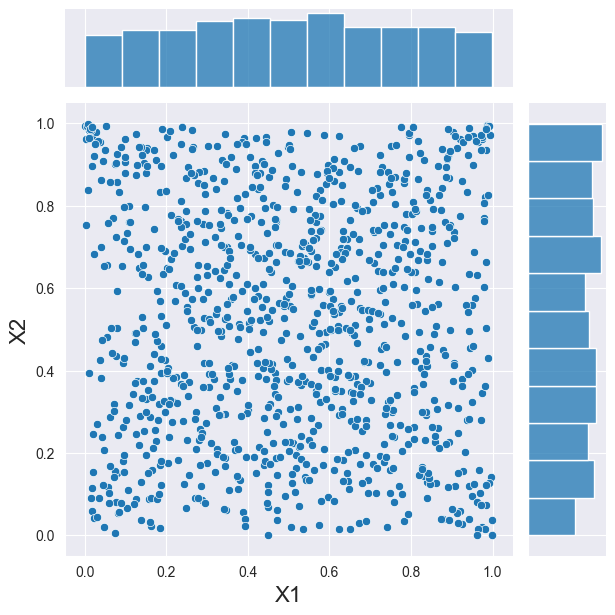

In [61]:
from statsmodels.distributions.copula.api import StudentTCopula
copula = StudentTCopula(df=3)
sample = copula.rvs(1000)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="scatter")
_ = h.set_axis_labels("X1", "X2", fontsize=16)